In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score, accuracy_score
from sklearn import metrics

def load_data(path, header):
    cancer_df = pd.read_csv(path, header=header)
    return cancer_df
if __name__ == "__main__":
    data = load_data("wdbc.dataset",None)
    
    #binarize the target values
    data.loc[data[1] == 'M', 1] = 1
    data.loc[data[1] == 'B', 1] = 0
    
    #split input from target and remove ID column
    X = data.iloc[:, 2:]
    y = data.iloc[:, 1]
    
    
    
    #labelencoder = LabelEncoder()
    
    #y.iloc[:, 0] = labelencoder.fit_transform(y.iloc[:,0])
    
    #split data into trainig, testing and validation    
    X_train, X_test, y_train, y_test  =train_test_split(X,y, test_size = 0.1, random_state=5)
    X_train, X_val, y_train, y_val  =train_test_split(X_train,y_train, test_size = 0.1, random_state=5)
    
    #scaling and standardization
    mm_scaler = preprocessing.MinMaxScaler()
    X_train_minmax = mm_scaler.fit_transform(X_train)
    #mm_scaler.transform(X_test)
    X_val_minmax = mm_scaler.fit_transform(X_val)
    X_test_minmax = mm_scaler.fit_transform(X_test)
    
    #Transpose to get feature*no_of_inputs
    X_train_minmax = X_train_minmax.T
    X_test_minmax = X_test_minmax.T
    X_val_minmax = X_val_minmax.T
    
    y_train = y_train.values.reshape(1, y_train.shape[0])
    y_val = y_val.values.reshape(1, y_val.shape[0])
    #y_test = y_test.values.reshape(1, y_test.shape[0])
      
    #logistic regression
    epochs = 5000
    learning_rate = 0.5
    def sigmoid(z):
        return 1/(1 +np.exp(-z))
    losstrack = []
    
    #feautre*no_of_inputs(0,1)
    #m is no of inputs
    #initialize bias and weights
    m = X_train_minmax.shape[1]
    w = np.random.randn(X_train_minmax.shape[0],1)*0.01
    b= 0
    m_val = X_val_minmax.shape[1]
    losstrack_val=[]
    for epoch in range(epochs):
        z = np.dot(w.T,X_train_minmax) + b
        p = sigmoid(z)
        #dotproduct gives values z of all inputs so we sum here
        cost = -np.sum(np.multiply(np.log(p), y_train) + np.multiply((1 - y_train), np.log(1 - p)))/m
        losstrack.append(np.squeeze(cost))
        z_val = np.dot(w.T,X_val_minmax) + b
        p_val = sigmoid(z_val)
        cost_val = -np.sum(np.multiply(np.log(p_val), y_val) + np.multiply((1 - y_val), np.log(1 - p_val)))/m_val
        losstrack_val.append(np.squeeze(cost_val))
        dz = p-y_train
        dw = (1/m)*np.dot(X_train_minmax,dz.T)
        db = (1/m)*np.sum(dz)
        w = w - learning_rate * dw
        b = b - learning_rate * db
  
    
        
    #testing    
    y_score = []
    
    z_test = np.dot(w.T,X_test_minmax) + b
    p_test = sigmoid(z_test)
    #print(p_test)
    

    #binarize the test score
    for i in np.nditer(p_test):
        if i >= 0.5:
            y_score.append(1)
        else :
            y_score.append(0)
    
    #print(y_score)
    
#     print(y_score)
#     p_test_binary =[]
#     for i in y_score:
#         if i > 0.5:
#             p_test_binary.append(1)
#         else:
#             p_test_binary.append(0)
    
    print(accuracy_score(y_test,y_score))
    
    print(precision_score(y_test,y_score))
    print(recall_score(y_test,y_score))
        
   
        
    

0.9824561403508771
1.0
0.9473684210526315


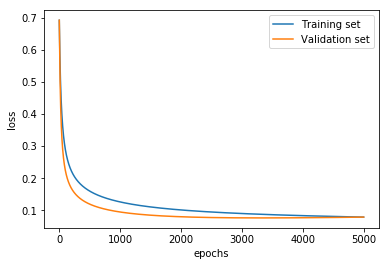

In [2]:
plt.plot(losstrack)
plt.plot(losstrack_val)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["Training set","Validation set"])


In [3]:
#cnf_matrix = metrics.confusion_matrix(y_test,y_score)
#cnf_matrix